# Feature Engineering

Creating new features of transforming existing features using domain knowledge of the data, that makes machine learning algorithm work better

#### Creating Features:
length od documents

Average word size within a document

using of puntuation in the text

captilization of words


#### Transformation:

power transformation

Standardizing data

Normalizing: bring different features to similar scale

In [1]:
import pandas as pd
import re
import string
import nltk

# Reading the data

In [2]:
data = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/NLTK/SMSSpamCollection", sep='\t', header=None)
data.columns=['label','msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Create Feature: message lenght

In [3]:
data['msg_len']=data['msg'].apply(lambda x: len(x))
data.head()

,label,msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Create Feature: punctation usage

In [5]:
def punctuation_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

data['pun_%']=data['msg'].apply(lambda x: punctuation_count(x))
data.head()

,label,msg,msg_len,pun_%
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3.278689


# Evaluate Created Features

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# plot message lengths for spam and ham

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


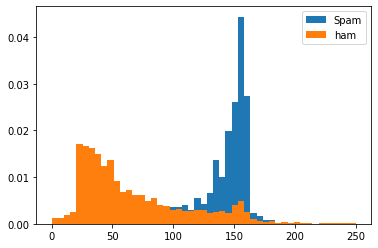

In [10]:
bins=np.linspace(0,250,50)
plt.hist(data[data['label']=='spam']['msg_len'], bins, label='Spam', normed=True)
plt.hist(data[data['label']=='ham']['msg_len'], bins, label='ham', normed=True)
plt.legend()
plt.show()

# Evaulate punctuation%

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


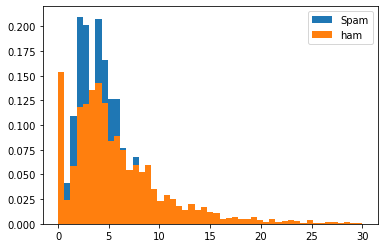

In [13]:
bins=np.linspace(0,30,50)
plt.hist(data[data['label']=='spam']['pun_%'], bins, label='Spam', normed=True)
plt.hist(data[data['label']=='ham']['pun_%'], bins, label='ham', normed=True)
plt.legend()
plt.show()

# Transformations

Changing each data point in a certain column to make the distribution look closer to a normal distribution

Tukey Transformation, Box-Cox Transformation

#### Transfirmation Process
Determine ranfe of exponents to test

Apply Transformation to each value of the chosen feature

Determine which transformation yeilds best distribution eg: plot histogram and pich which looks closer to a normal distribution

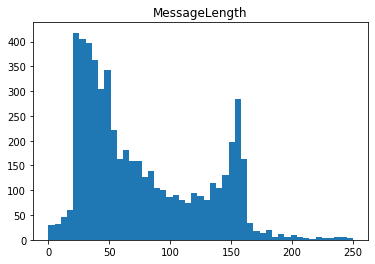

In [14]:
bins=np.linspace(0,250,50)
plt.hist(data['msg_len'], bins)
plt.title('MessageLength')
plt.show()

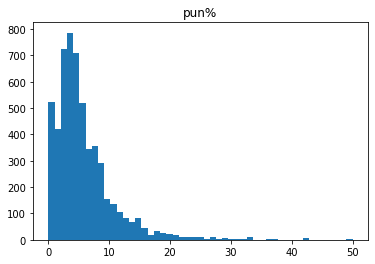

In [16]:
bins=np.linspace(0,50,50)
plt.hist(data['pun_%'], bins)
plt.title('pun%')
plt.show()

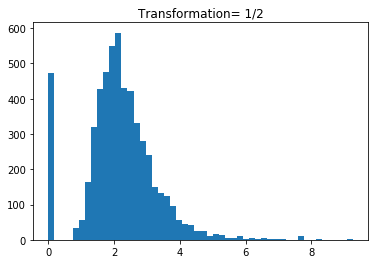

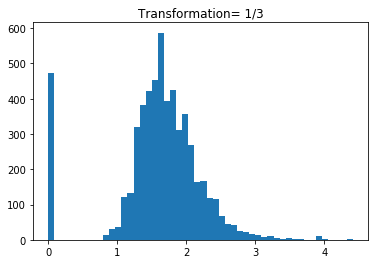

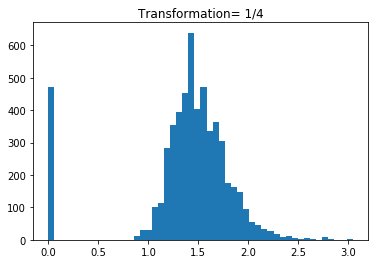

In [19]:
for i in [2,3,4]:
    plt.hist((data['pun_%'])**(1/i), bins=50)
    plt.title(f"Transformation= 1/{i}")
    plt.show()

# Evaluation 

#### 1- Accuracy = predicted_correctly/obs
#### 2- Precision = predicted_as_Spam_Correctly/Predicted_as_Spam
#### 3- Recall = predicted_as_spam_correctly/actually_spam